In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set_context("notebook")

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.colors as colors
#      "undef",  "shale",  "sltShale", "clnSand", "sltSand1", "sltSand2", "cemSand"
ccc = ['#B3B3B3','#996633', '#1B4F72', '#FFC82E','#FF7A36', '#DB0000', '#40CBFF']

In [2]:
import platform
my_os = platform.system()
print("OS in my system : ",my_os)

if my_os == 'Windows':
    path = r"C:\Users\Dunbar\Dropbox\Work\QSI\data"
elif my_os == 'Linux':
    path = '/home/alex/Dropbox/Work/QSI/data'
    
print(f"Path: {path}")

OS in my system :  Windows
Path: C:\Users\Dunbar\Dropbox\Work\QSI\data


In [3]:
import os

print(os.name)

# window = 'nt'
# linux = 'posix'

nt


In [4]:
# # at work
# path = r'C:\Users\ALDUNBAR\OneDrive - Wintershall Dea AG\Python\data'
# file = 'well-3.las'

# path_file = path + "\\" + file

In [5]:

file = 'well_3.las'

# path_file = path + "\\" + file
path_file = path +'/'+ file

# !pip install lasio
import lasio

well = lasio.read(path_file)

well3 = well.df()

well3 = well3.replace(-9999.0,np.NaN)
well3 = well3[(well3.index>2100)&(well3.index<2300)]
well3.reset_index(inplace=True)
well3.rename(columns = {'DEPT':'DEPTH'}, inplace = True)

In [6]:
# well1 = pd.read_csv("./data/well_1.txt", header=None, skiprows=1, sep="  ", usecols=[0,4,8,11])
# well1.rename(columns={0:"DEPTH", 4:"VP", 8:"DEN", 11:"GR"}, inplace=True)

well2 = pd.read_csv("./data/well_2.txt", header=None, skiprows=1, sep="  ", usecols=[0,3,6,9,11,14])
well2.rename(columns={0:"DEPTH", 3:"VP", 6:"VS", 9:"DEN", 11:"GR", 14:"NPHI" }, inplace=True)

# well3 = pd.read_csv("./data/well_3.txt", header=None, skiprows=1, sep=" ", usecols=[5,13,17,24], na_values=-9999.0)
# well3.rename(columns={5:"DEPTH", 13:"VP", 17:"DEN", 24:"GR"}, inplace=True)

# well4 = pd.read_csv("./data/well_4.txt", header=None, skiprows=1, sep=" ", usecols=[4,12,20,27])
# well4.rename(columns={4:"DEPTH", 12:"VP", 20:"DEN", 27:"GR"}, inplace=True)

#well5 = pd.read_csv("./data/well_5.txt", header=None, skiprows=1, sep=" ", usecols=[3,6,9,12,15])
#well5.rename(columns={3:"DEPTH", 6:"t_p", 9:"t_s", 12:"GR", 15:"DEN"}, inplace=True)

In [7]:
facies_labels = ["shale", "sltShale", "clnSand", "sltSand1", "sltSand2", "cemSand"]
facies = [1,2,3,4,5,6]
colors = ["black", "brown", "green", "purple", "orange", "magenta"]

conditions = [
    (well2["DEPTH"].ge(2078.0) & well2["DEPTH"].lt(2105.0)),
    (well2["DEPTH"].ge(2143.2) & well2["DEPTH"].lt(2154.1)),
    (well2["DEPTH"].ge(2154.1) & well2["DEPTH"].lt(2164.1)),
    (well2["DEPTH"].ge(2168.1) & well2["DEPTH"].lt(2184.1)),
    (well2["DEPTH"].ge(2186.1) & well2["DEPTH"].lt(2200.1)),
    (well2["DEPTH"].ge(2254.0) & well2["DEPTH"].lt(2300.1)),
]

well2["FACIES"] = np.select(conditions, facies)

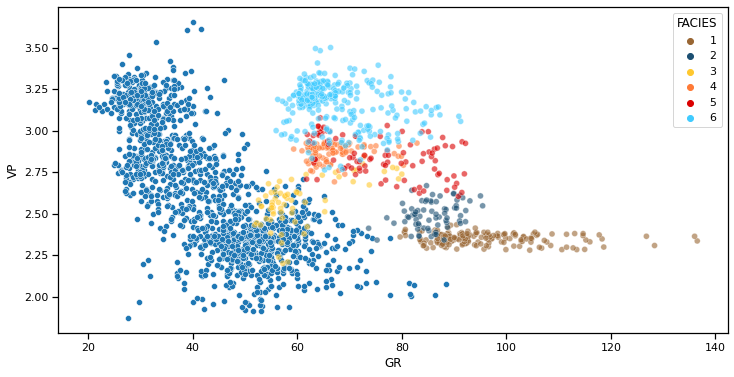

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=well3[(well3.DEPTH>2100) & (well3.DEPTH<2300)], x="GR", y="VP")
sns.scatterplot(data=well2[well2.FACIES!=0], x="GR", y="VP", hue='FACIES', palette=ccc[1:], alpha=0.6);

In [8]:
scaler = StandardScaler()
GR2 = np.array(well2.GR).reshape(-1, 1)
GR3 = np.array(well3.GR).reshape(-1, 1)
X2 = scaler.fit_transform(GR2)
X3 = scaler.fit_transform(GR3)

In [15]:
print(f"well2.GR: mean: {well2.GR.mean()}, stddev: {well2.GR.std()}")
print(f"normalised well2.GR: mean: {X2.mean()}, stddev: {X2.std()}")
print(f"well3.GR: mean: {well3.GR.mean()}, stddev: {well3.GR.std()}")
print(f"normalised well3.GR: mean: {X3.mean()}, stddev: {X3.std()}")

well2.GR: mean: 72.78512484818944, stddev: 14.464119835129793
normalised well2.GR: mean: -3.589819991209639e-16, stddev: 1.0
well3.GR: mean: 43.506763414634314, stddev: 11.892960745187802
normalised well3.GR: mean: 2.1662888285368908e-16, stddev: 1.0


In [9]:
import scipy.stats as ss

x3 = ss.zscore(X3) * well2.GR.std() + well2.GR.mean()
x3.mean(), x3.std()

(72.78512484818944, 14.464119835129795)

In [10]:
well2['GR_norm'] = X2
well3['GR_norm'] = X3
well3['GR_normW2'] = x3

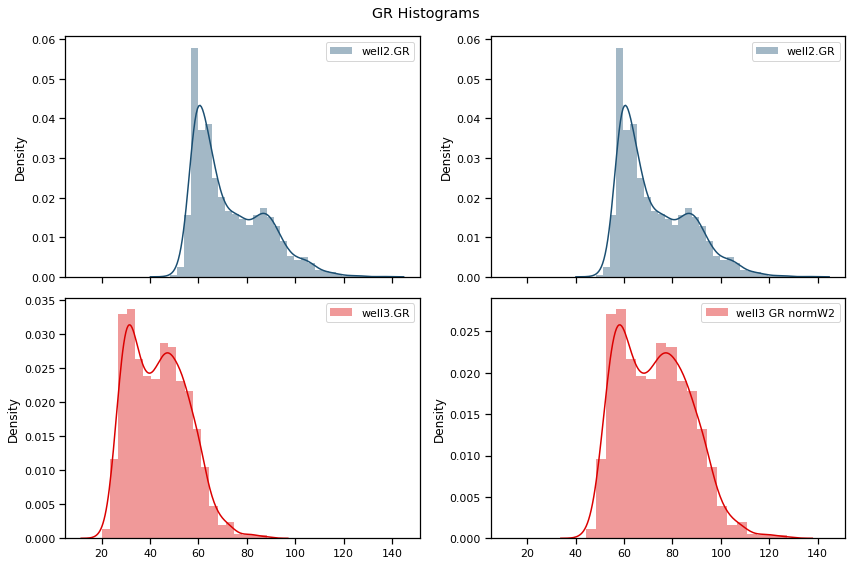

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(12,8))
fig.suptitle('GR Histograms')
sns.distplot(ax=ax1, x=well2.GR, color=ccc[2], label="well2.GR")
sns.distplot(ax=ax2, x=well2.GR, color=ccc[2], label="well2.GR")
sns.distplot(ax=ax3, x=well3.GR, color=ccc[5], label="well3.GR")
sns.distplot(ax=ax4, x=well3.GR_normW2, color=ccc[5], label="well3 GR normW2")

for ax in fig.get_axes():
    ax.legend()
    #ax.label_outer()
    
plt.tight_layout()

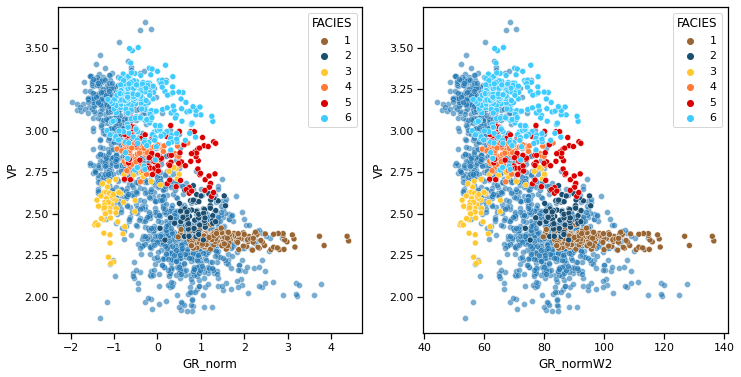

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
                               
sns.scatterplot(ax=ax1, data=well3, x="GR_norm", y="VP", alpha=0.6)
sns.scatterplot(ax=ax1, data=well2[well2.FACIES!=0], x="GR_norm", y="VP", hue='FACIES', palette=ccc[1:])

sns.scatterplot(ax=ax2, data=well3, x="GR_normW2", y="VP", alpha=0.6)
sns.scatterplot(ax=ax2, data=well2[well2.FACIES!=0], x="GR", y="VP", hue='FACIES', palette=ccc[1:]);

In [11]:
train = well2[['VP', 'GR', 'FACIES']][well2['FACIES']!=0]

In [12]:
test = well3[(well3.DEPTH>2100) & (well3.DEPTH<2300)][['VP',  'GR_normW2']]

In [13]:
train.groupby('FACIES').count()

,VP,GR
FACIES,,
1,178,178
2,72,72
3,65,65
4,105,105
5,92,92
6,303,303


In [14]:
y = train.FACIES
X = train[['VP', 'GR']]

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

In [20]:
# Look at implementing pipeline...

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# pipe = make_pipeline(StandardScaler(), GaussianNB())
# pipe.fit(X_train, y_train)  # apply scaling on training data

# pipe.score(X_test, y_test)

In [21]:
# #X = shuffle(X)  # !!! shuffle X,y together !!!

# # Standardise all X training/testing data
# scaler = StandardScaler().fit(X)
# X = scaler.transform(X)

# # create X_train, X_test from standarised X
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [22]:
#print(f"X_train after X is standardised: \n{X_train[:5]}")
#print(f"X_test after X is standardised: \n{X_test[:5]}")

In [16]:
# create X_train, X_test from un-standarised X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Standardise X_train
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
# Standardise X_test from X_train
X_test = scaler.transform(X_test)

In [24]:
#print(f"X_train after X is standardised: \n{X_train[:5]}")
#print(f"X_test after X is standardised: \n{X_test[:5]}")

In [25]:
# naive Bayes

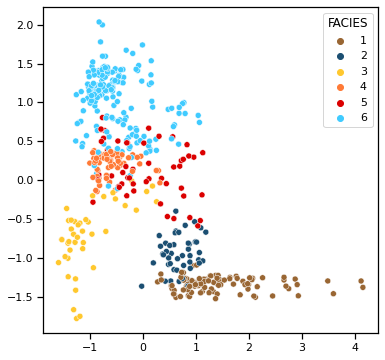

In [26]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=X_train, x=X_train[:,1], y=X_train[:,0], hue=y_train, palette=ccc[1:]);

In [17]:
model = GaussianNB()
model.fit(X_train, y_train);

[(-2.0, 2.0), (-3.0, 3.0)]

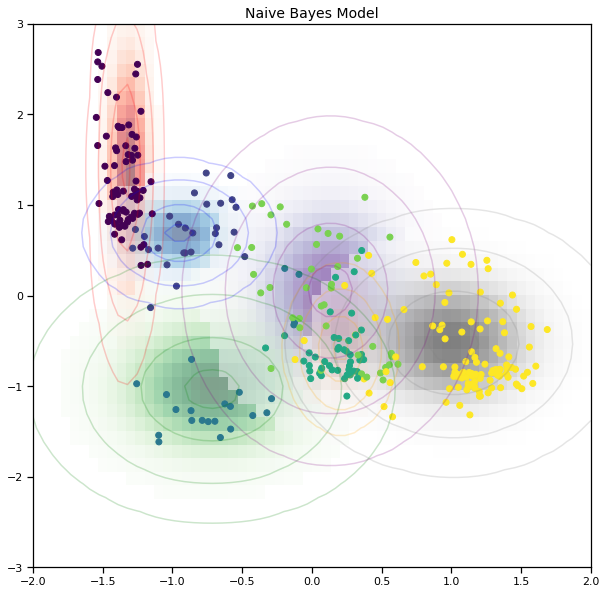

In [28]:
fig, ax = plt.subplots(figsize=(10,10))

# ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='rainbow', alpha=0.3)
ax.scatter(X_test[:,0], X_test[:,1], c=y_test)
ax.set_title('Naive Bayes Model', size=14)

xlim = (-2, 2)
ylim = (-3, 3)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(["red", "blue", "green", "orange", "purple", "grey"], start=1):  # facies (1->6)
    # X,y or X_train,y_train
    # mask = (y == label)
    # mu, std = X[mask].mean(0), X[mask].std(0)
    mask = (y_train == label)
    mu, std = X_train[mask].mean(0), X_train[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

In [18]:
y_pred = model.predict(X_test)

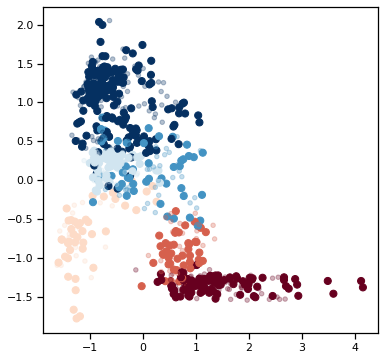

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(X_train[:, 1], X_train[:, 0], c=y_train, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_test[:, 1], X_test[:, 0], c=y_pred, s=20, cmap='RdBu', alpha=0.3)
plt.axis(lim);

In [25]:
yprob = model.predict_proba(X_test)
# yprob[-20:].round(2)

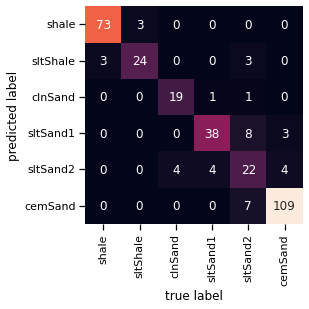

In [26]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)  # true, pred, all
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=facies_labels, yticklabels=facies_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [33]:
# confusion_matrix(y_test, y_pred, normalize='pred')  # normalises over COLS => Predictions

In [34]:
# confusion_matrix(y_test, y_pred, normalize='true')  # normalises over ROWS => True

In [35]:
# confusion_matrix(y_test, y_pred, normalize='all')  # normalises over ROWS and COLS

In [36]:
bootstrap_num = 500

In [37]:
for i in range(bootstrap_num):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if i == 0:
    
        bootstrap = confusion_matrix(y_test, y_pred, normalize='pred')  # normalises over COLS => Predictions
        
    else: bootstrap = np.append(bootstrap, confusion_matrix(y_test, y_pred, normalize='pred'))

In [38]:
bootstrap = bootstrap.reshape(bootstrap_num,6,6)

(0.1, 1.1)

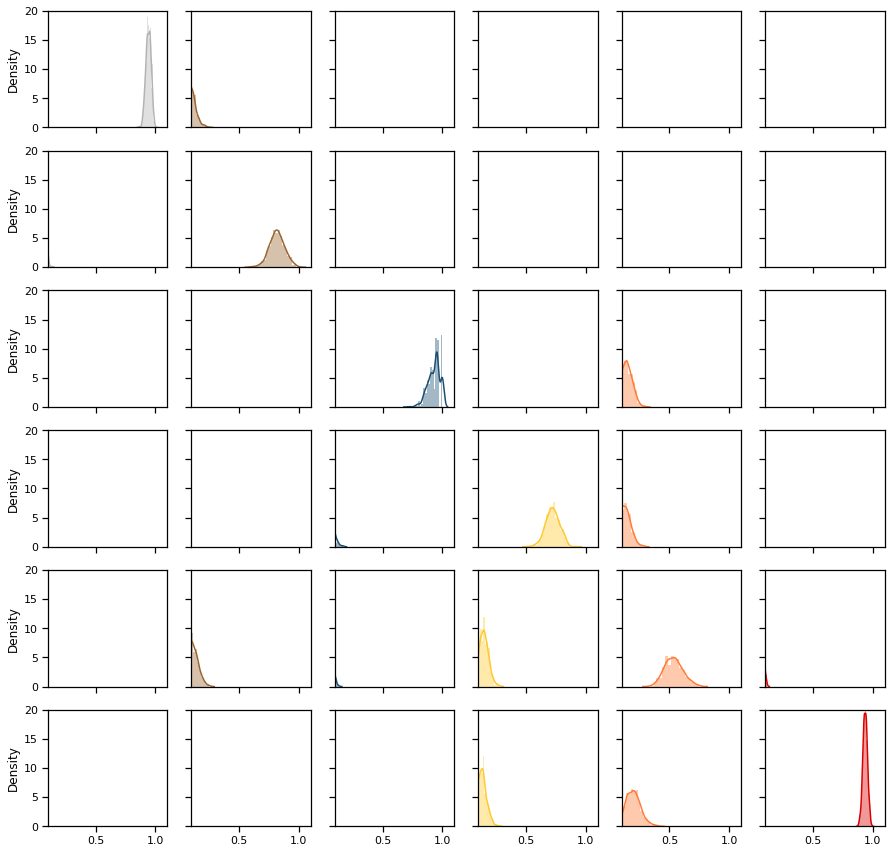

In [39]:
import seaborn as sns
fig, ((ax1,ax2,ax3,ax4,ax5,ax6),
      (ax7,ax8,ax9,ax10,ax11,ax12),
     (ax13,ax14,ax15,ax16,ax17,ax18),
     (ax19,ax20,ax21,ax22,ax23,ax24),
     (ax25,ax26,ax27,ax28,ax29,ax30),
     (ax31,ax32,ax33,ax34,ax35,ax36)) = plt.subplots(6, 6, sharex=True, sharey=True,figsize=(15,15))


sns.distplot(ax=ax1, x=bootstrap[:,0,0], color=ccc[0], label="shale-shale")
sns.distplot(ax=ax2, x=bootstrap[:,0,1], color=ccc[1], label="shale-shale")
sns.distplot(ax=ax3, x=bootstrap[:,0,2], color=ccc[2], label="shale-shale")
sns.distplot(ax=ax4, x=bootstrap[:,0,3], color=ccc[3], label="shale-shale")
sns.distplot(ax=ax5, x=bootstrap[:,0,4], color=ccc[4], label="shale-shale")
sns.distplot(ax=ax6, x=bootstrap[:,0,5], color=ccc[5], label="shale-shale")

sns.distplot(ax=ax7, x=bootstrap[:,1,0], color=ccc[0], label="shale-shale")
sns.distplot(ax=ax8, x=bootstrap[:,1,1], color=ccc[1], label="shale-shale")
sns.distplot(ax=ax9, x=bootstrap[:,1,2], color=ccc[2], label="shale-shale")
sns.distplot(ax=ax10, x=bootstrap[:,1,3], color=ccc[3], label="shale-shale")
sns.distplot(ax=ax11, x=bootstrap[:,1,4], color=ccc[4], label="shale-shale")
sns.distplot(ax=ax12, x=bootstrap[:,1,5], color=ccc[5], label="shale-shale")

sns.distplot(ax=ax13, x=bootstrap[:,2,0], color=ccc[0], label="shale-shale")
sns.distplot(ax=ax14, x=bootstrap[:,2,1], color=ccc[1], label="shale-shale")
sns.distplot(ax=ax15, x=bootstrap[:,2,2], color=ccc[2], label="shale-shale")
sns.distplot(ax=ax16, x=bootstrap[:,2,3], color=ccc[3], label="shale-shale")
sns.distplot(ax=ax17, x=bootstrap[:,2,4], color=ccc[4], label="shale-shale")
sns.distplot(ax=ax18, x=bootstrap[:,2,5], color=ccc[5], label="shale-shale")

sns.distplot(ax=ax19, x=bootstrap[:,3,0], color=ccc[0], label="shale-shale")
sns.distplot(ax=ax20, x=bootstrap[:,3,1], color=ccc[1], label="shale-shale")
sns.distplot(ax=ax21, x=bootstrap[:,3,2], color=ccc[2], label="shale-shale")
sns.distplot(ax=ax22, x=bootstrap[:,3,3], color=ccc[3], label="shale-shale")
sns.distplot(ax=ax23, x=bootstrap[:,3,4], color=ccc[4], label="shale-shale")
sns.distplot(ax=ax24, x=bootstrap[:,3,5], color=ccc[5], label="shale-shale")

sns.distplot(ax=ax25, x=bootstrap[:,4,0], color=ccc[0], label="shale-shale")
sns.distplot(ax=ax26, x=bootstrap[:,4,1], color=ccc[1], label="shale-shale")
sns.distplot(ax=ax27, x=bootstrap[:,4,2], color=ccc[2], label="shale-shale")
sns.distplot(ax=ax28, x=bootstrap[:,4,3], color=ccc[3], label="shale-shale")
sns.distplot(ax=ax29, x=bootstrap[:,4,4], color=ccc[4], label="shale-shale")
sns.distplot(ax=ax30, x=bootstrap[:,4,5], color=ccc[5], label="shale-shale")

sns.distplot(ax=ax31, x=bootstrap[:,5,0], color=ccc[0], label="shale-shale")
sns.distplot(ax=ax32, x=bootstrap[:,5,1], color=ccc[1], label="shale-shale")
sns.distplot(ax=ax33, x=bootstrap[:,5,2], color=ccc[2], label="shale-shale")
sns.distplot(ax=ax34, x=bootstrap[:,5,3], color=ccc[3], label="shale-shale")
sns.distplot(ax=ax35, x=bootstrap[:,5,4], color=ccc[4], label="shale-shale")
sns.distplot(ax=ax36, x=bootstrap[:,5,5], color=ccc[5], label="shale-shale")

plt.ylim(0,20)
plt.xlim(0.1,1.1)

In [19]:
X_well3 = np.array(well3[['VP', 'GR_normW2']])
X_well3 = scaler.transform(X_well3)

In [20]:
y_pred_well3 = model.predict(X_well3)

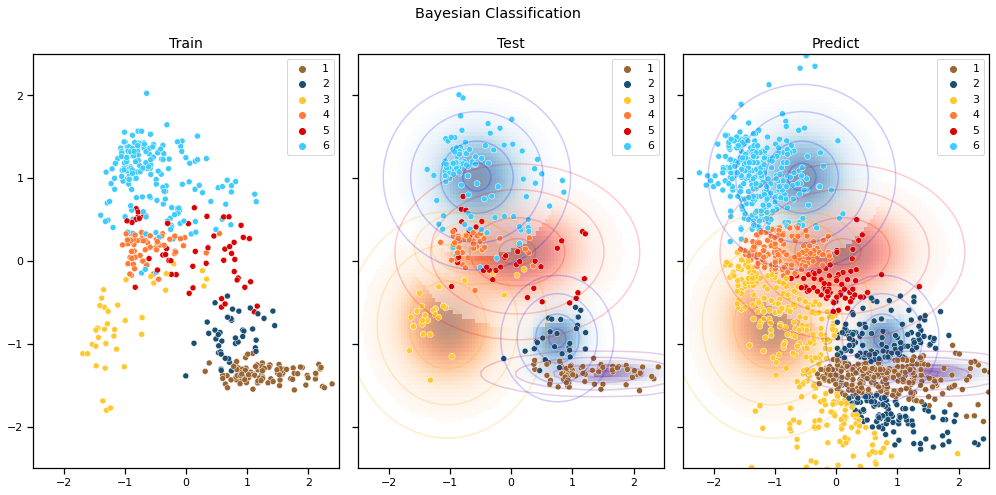

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(14,7))
fig.suptitle('Bayesian Classification')

sns.scatterplot(ax=ax1, data=X_train, x=X_train[:,1], y=X_train[:,0], hue=y_train, palette=ccc[1:])
ax1.set_title('Train', size=14)

sns.scatterplot(ax=ax2, x=X_test[:,1], y=X_test[:,0], hue=y_test, palette=ccc[1:])
ax2.set_title('Test', size=14)

# will only work with equal x,y limits: haven't worked out how colours / contours work together
xlim = (-2.5, 2.5)
ylim = (-2.5, 2.5)

# Transposed the axes to fit with x: GR, y:Vp
xg = np.linspace(xlim[0], xlim[1], 100)  #60, yg works
yg = np.linspace(ylim[0], ylim[1], 100)  #40, xg works
yy, xx = np.meshgrid(xg, yg) # swapped xx, yy
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

#for label, color in enumerate(["red", "blue", "green", "orange", "purple", "grey"], start=1):
for label, color in enumerate(["purple", "blue", "orange", "orange", "red", "blue"], start=1):

    mask = (y_train == label)
    mu, std = X_train[mask].mean(0), X_train[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)  # Product of normals ??
    Pm = np.ma.masked_array(P, P < 0.03)  # 0.03, affects "influence" of each pdf ???
    ax2.pcolorfast(yg, xg, Pm.reshape(yy.shape), alpha=0.5, cmap=color.title() + 's')
    ax2.contour(yy, xx, P.reshape(xx.shape), levels=[0.01, 0.1, 0.5, 0.9], colors=color, alpha=0.2)
    ax3.pcolorfast(yg, xg, Pm.reshape(yy.shape), alpha=0.5, cmap=color.title() + 's')
    ax3.contour(yy, xx, P.reshape(xx.shape), levels=[0.01, 0.1, 0.5, 0.9], colors=color, alpha=0.2)
    
ax2.set(xlim=xlim, ylim=ylim)

sns.scatterplot(ax=ax3, data=X_well3, x=X_well3[:,1], y=X_well3[:,0], hue=y_pred_well3, palette=ccc[1:]);
ax3.set_title("Predict", size=14)
for ax in fig.get_axes():
    ax.legend()
    #ax.label_outer()
    
plt.tight_layout()

In [43]:
# model.predict_proba(X_well3).round(2)[:20]

In [21]:
well3['FACIES_p'] = y_pred_well3

In [30]:
import xarray as xr
#!pip install sklearn_xarray
from sklearn_xarray import wrap

In [31]:
# load X_well3 n times to simulate xarray seismic volume

In [30]:
vp3 = np.random.random(1312)*well3.VP.std() + well3.VP.mean() # well3.VP
gr3 = np.random.random(1312)*well3.GR.std() + well3.GR.mean() # well3.GR

for i in range(399):
    vp3 = np.append(vp3, np.random.random(1312)*well3.VP.std() + well3.VP.mean())
    gr3 = np.append(gr3, np.random.random(1312)*well3.GR.std() + well3.GR.mean())
    
vp3 = vp3.reshape(20,20,1312)
gr3 = gr3.reshape(20,20,1312)

In [31]:
# ds is in a seismic volume arrangement
ds = xr.Dataset(
    data_vars = {
        "Vp": (("il", "xl", "twt"), vp3),
        "GR": (("il", "xl", "twt"), gr3),
    },
    coords={
        "il":np.arange(101,101+vp3.shape[0],1),
        "xl":np.arange(1,1+vp3.shape[0],1),
        "twt":np.arange(0,5248,4),
        },
)

In [47]:
ds

<xarray.Dataset>
Dimensions:  (il: 20, xl: 20, twt: 1312)
Coordinates:
  * il       (il) int32 101 102 103 104 105 106 107 ... 115 116 117 118 119 120
  * xl       (xl) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * twt      (twt) int32 0 4 8 12 16 20 24 ... 5224 5228 5232 5236 5240 5244
Data variables:
    Vp       (il, xl, twt) float64 2.922 2.746 2.963 2.637 ... 2.737 2.894 2.972
    GR       (il, xl, twt) float64 49.81 48.04 44.84 47.55 ... 46.98 50.48 54.07

In [49]:
vp3 = np.random.random(1312)*well3.VP.std() + well3.VP.mean() # well3.VP
gr3 = np.random.random(1312)*well3.GR.std() + well3.GR.mean() # well3.GR

for i in range(399):
    vp3 = np.append(vp3, np.random.random(1312)*well3.VP.std() + well3.VP.mean())
    gr3 = np.append(gr3, np.random.random(1312)*well3.GR.std() + well3.GR.mean())
    
vp3 = vp3.reshape(20,20,1312)
gr3 = gr3.reshape(20,20,1312)

vp3_xr = xr.DataArray(vp3,
                      dims=('il', 'xl', 'twt'),
                      name='well3',
                      coords={
                          "il":np.arange(101,101+vp3.shape[0],1), 
                          "xl":np.arange(1,1+vp3.shape[0],1), 
                          "twt":np.arange(0,5248,4)
                              },
                      )

gr3_xr = xr.DataArray(gr3,
                      dims=('il', 'xl', 'twt'),
                      name='well3',
                      coords={
                          "il":np.arange(101,101+vp3.shape[0],1), 
                          "xl":np.arange(1,1+vp3.shape[0],1), 
                          "twt":np.arange(0,5248,4)
                              },
                      )

xr3_ds = vp3_xr.to_dataset(name = 'Vp')
xr3_ds['GR'] = gr3_xr

In [50]:
xr3_ds
xr3_ds.isel(il=10, xl=10)  # xr3_ds[{'il':10, 'xl':10}]
xr3_ds.isel(twt=800)  # xr3_ds[{'twt':800}]
xr3_ds['Vp'].isel(twt=800)  # xr3_ds['Vp'][:,:,800]
xr3_ds.isel(il=slice(None, 2), xl=slice(17, None))

<xarray.Dataset>
Dimensions:  (il: 2, xl: 3, twt: 1312)
Coordinates:
  * il       (il) int32 101 102
  * xl       (xl) int32 18 19 20
  * twt      (twt) int32 0 4 8 12 16 20 24 ... 5224 5228 5232 5236 5240 5244
Data variables:
    Vp       (il, xl, twt) float64 2.678 2.859 2.881 2.916 ... 2.682 2.775 2.76
    GR       (il, xl, twt) float64 49.48 45.56 43.76 48.72 ... 50.17 45.94 53.0

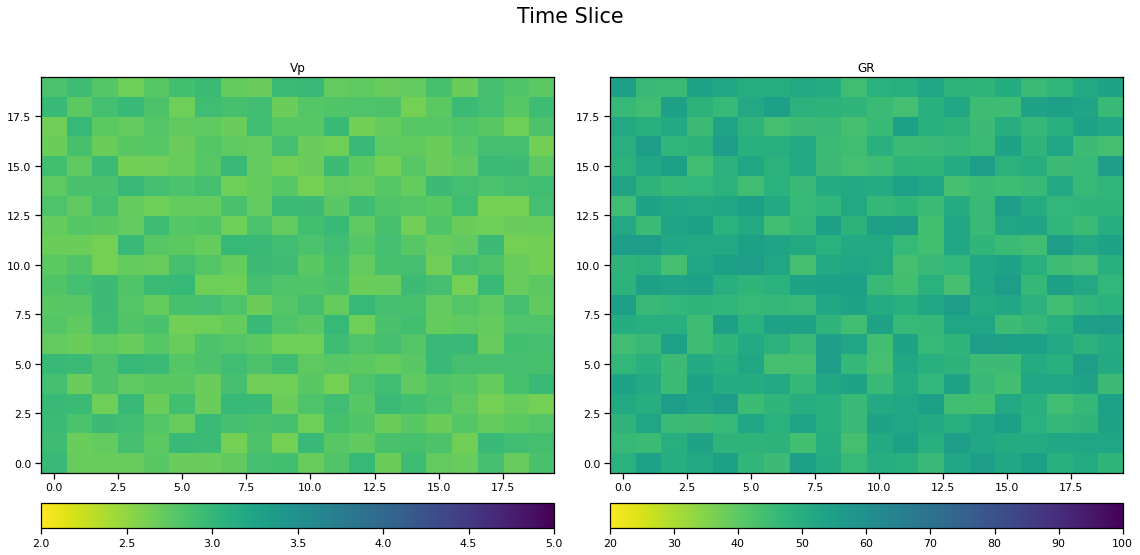

In [51]:
fig, axs = plt.subplots(1,2, figsize = (16,8))

# Define the map extent and common plotting parameters
#extent = [xlines[0], xlines[-1], ilines[0], ilines[-1]]
plt_kwargs = {'cmap':'viridis_r', 'origin':'lower', 'aspect':'auto'}#, 'extent':extent}

# Plot Vp "twt" slice
#im1=axs[0].imshow(xr3_ds['Vp'][:,:,800], **plt_kwargs, vmin=2, vmax=5)
im1=axs[0].imshow(xr3_ds['Vp'].isel(twt=800), **plt_kwargs, vmin=2, vmax=5)
axs[0].set_title('Vp')
fig.colorbar(im1, ax=axs[0], orientation='horizontal', pad=0.06)

# Plot GR "twt" slice
im2=axs[1].imshow(xr3_ds['GR'].isel(twt=800), **plt_kwargs, vmin=20, vmax=100)
axs[1].set_title('GR')
fig.colorbar(im2, ax=axs[1], orientation='horizontal', pad=0.06)

# Add a title to the figure
fig.suptitle('Time Slice', size='xx-large', va='bottom')
plt.tight_layout()
plt.show()

In [52]:
vp3_xr.data[:1]

array([[[2.89097279, 2.69767793, 2.86939216, ..., 2.72562745,
         2.9255142 , 2.91609099],
        [2.85425728, 2.92802557, 2.67065163, ..., 2.92955522,
         2.99159009, 2.87073534],
        [2.68214097, 2.91085545, 2.92092041, ..., 2.74707819,
         2.85507922, 2.9341547 ],
        ...,
        [2.6779872 , 2.85889853, 2.88111025, ..., 2.77755308,
         2.75079473, 2.85148894],
        [2.63256697, 2.7415463 , 2.82481638, ..., 2.9559874 ,
         2.84271448, 2.62520131],
        [2.64034727, 2.85363088, 2.6633391 , ..., 2.92592479,
         2.92151941, 2.9354292 ]]])

In [53]:
# xr3t = wrap(model.predict((vp3_xr.data, gr3_xr.data)))

In [54]:
from sklearn.datasets import make_gaussian_quantiles

In [55]:
# construct dataset
X1, y1 = make_gaussian_quantiles(cov=1., n_samples=1000, n_features=3, n_classes=2, random_state=1)

In [56]:
X1 = pd.DataFrame(X1, columns=['x', 'y', 'z'])
y1 = pd.Series(y1)

In [57]:
import plotly

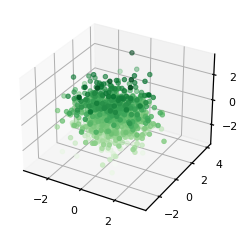

In [58]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
# zline = np.linspace(0, 15, 1000)
# xline = np.sin(zline)
# yline = np.cos(zline)
# ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = X1.z  # 15 * np.random.random(100)
xdata = X1.x  # np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = X1.y  # np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [59]:
from sklearn.datasets import make_classification

In [60]:
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3,
                          n_redundant=0, n_repeated=0, n_classes=3,
                          n_clusters_per_class=2, class_sep=1.5,
                          flip_y=0, weights=[0.5, 0.5, 0.5])

X = pd.DataFrame(X)
y = pd.Series(y)

In [61]:
X[0]

0     -0.966184
1     -1.884932
2     -1.092789
3     -1.024076
4     -1.429055
         ...   
995   -1.585455
996   -1.580125
997    4.593176
998    1.297432
999    1.634020
Name: 0, Length: 1000, dtype: float64

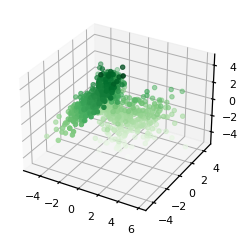

In [62]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
# zline = np.linspace(0, 15, 1000)
# xline = np.sin(zline)
# yline = np.cos(zline)
# ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = X[0]  # 15 * np.random.random(100)
xdata = X[1]  # np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = X[2]  # np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [63]:
def make_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))
    #print("Feature importances:\n{}".format(model.feature_importances_))
    predictions = model.predict(X_test)
    conf = confusion_matrix(y_test, predictions)
    #print(display_cm(conf, facies, hide_zeros=True))
    print(confusion_matrix(y_test, predictions))
    #print(score(y_test.values, predictions))


In [64]:
model = RandomForestClassifier(random_state=0)
make_model(model, X_train, y_train, X_test, y_test)

Accuracy on training set: 1.000
Accuracy on test set: 0.883
[[ 71   6   0   0   0   0]
 [  2  26   0   0   0   0]
 [  0   0  25   0   2   0]
 [  0   0   1  39   2   2]
 [  0   2   3   4  21   7]
 [  0   0   0   4   3 106]]


In [65]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [66]:
model = GradientBoostingClassifier()
make_model(model, X_train, y_train, X_test, y_test)

Accuracy on training set: 1.000
Accuracy on test set: 0.868
[[ 72   5   0   0   0   0]
 [  1  26   0   0   1   0]
 [  0   1  23   0   3   0]
 [  0   0   1  38   3   2]
 [  0   2   4   5  20   6]
 [  0   0   0   3   6 104]]


In [67]:
model = AdaBoostClassifier()
make_model(model, X_train, y_train, X_test, y_test)

Accuracy on training set: 0.611
Accuracy on test set: 0.574
[[  0  77   0   0   0   0]
 [  0  15   2   0  11   0]
 [  0   0  18   9   0   0]
 [  0   0   0  41   1   2]
 [  0   0   0  17  12   8]
 [  0   0   0   5   7 101]]


In [68]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=6)
# make_model(model, train, train_labels, val, val_labels)
make_model(model, X_train, y_train, X_test, y_test)

Accuracy on training set: 0.898
Accuracy on test set: 0.850
[[ 72   5   0   0   0   0]
 [  6  22   0   0   0   0]
 [  0   0  24   1   2   0]
 [  0   0   1  39   3   1]
 [  0   3   2  11  19   2]
 [  0   0   0   7   5 101]]


In [25]:
import xarray as xr
#!pip install sklearn_xarray
from sklearn_xarray import wrap

In [26]:
from sklearn_xarray.datasets import load_dummy_dataarray
from sklearn_xarray import wrap
from sklearn.preprocessing import StandardScaler

X = load_dummy_dataarray()
Xt = wrap(StandardScaler()).fit_transform(X)

In [27]:
X

<xarray.DataArray (sample: 100, feature: 10)>
array([[0.35183062, 0.96709666, 0.28498165, 0.812378  , 0.82660174,
        0.32456603, 0.68606841, 0.17438992, 0.46464367, 0.50597897],
       [0.3792155 , 0.92929804, 0.04058787, 0.03538233, 0.79570655,
        0.61500544, 0.90541377, 0.06172612, 0.91115268, 0.61867513],
       [0.04660152, 0.61830473, 0.97938908, 0.58143441, 0.38970225,
        0.98708361, 0.36182563, 0.19898194, 0.7392758 , 0.71774857],
       [0.87835572, 0.09881623, 0.9136666 , 0.04967377, 0.79885481,
        0.22680369, 0.49069012, 0.5585269 , 0.96257867, 0.54644923],
       [0.13879792, 0.44988426, 0.28090404, 0.75054627, 0.92729397,
        0.1103512 , 0.14686929, 0.33880086, 0.83543059, 0.14093303],
       [0.84446574, 0.7238178 , 0.48571844, 0.60013566, 0.47104115,
        0.44442348, 0.80899401, 0.81152964, 0.82978777, 0.09989791],
       [0.55064709, 0.87568274, 0.66252523, 0.33264313, 0.96659013,
        0.73032903, 0.39255492, 0.16867609, 0.31749818, 0.98261   ],
       [0.02490408, 0.36733585, 0.49954975, 0.99262576, 0.07094699,
        0.17253502, 0.16843969, 0.863108  , 0.13390156, 0.56028265],
       [0.29902682, 0.58342447, 0.51443942, 0.33248755, 0.26073485,
        0.81232065, 0.65390706, 0.72966133, 0.74409027, 0.16399858],
       [0.55586054, 0.54036298, 0.09908652, 0.67477995, 0.38052705,
        0.91720694, 0.02138843, 0.63647078, 0.01860256, 0.3886664 ],
...
       [0.97687444, 0.28821925, 0.42820302, 0.28564293, 0.04448349,
        0.99733364, 0.83061325, 0.54151726, 0.95711596, 0.18373647],
       [0.73775277, 0.28153277, 0.44478728, 0.61637315, 0.6053831 ,
        0.29228546, 0.32495297, 0.68038754, 0.90353682, 0.24433646],
       [0.43862822, 0.33239947, 0.66315888, 0.10364378, 0.1669384 ,
        0.22085436, 0.47396806, 0.3540783 , 0.63782829, 0.03338187],
       [0.881515  , 0.0712979 , 0.19074355, 0.04627671, 0.25280613,
        0.52887817, 0.00896169, 0.45822399, 0.60090253, 0.46770367],
       [0.8460533 , 0.86028335, 0.18873575, 0.01205507, 0.51929052,
        0.07849253, 0.10949   , 0.99637718, 0.32217267, 0.0517672 ],
       [0.70605927, 0.65593912, 0.94262465, 0.84148861, 0.73373529,
        0.96296696, 0.0704052 , 0.00126674, 0.15053774, 0.89825404],
       [0.3108451 , 0.54073972, 0.6549562 , 0.88393445, 0.06128552,
        0.57224965, 0.07304693, 0.15427561, 0.66390241, 0.33140293],
       [0.59852822, 0.427602  , 0.00617909, 0.06069997, 0.34450473,
        0.19514865, 0.91551538, 0.66523989, 0.09439893, 0.89170371],
       [0.553585  , 0.59308946, 0.20495524, 0.58309907, 0.18320595,
        0.73788714, 0.56617498, 0.1123013 , 0.11199963, 0.27693771],
       [0.25195811, 0.90943503, 0.0910444 , 0.75186225, 0.01978144,
        0.22259528, 0.74377901, 0.3102644 , 0.57009653, 0.02654131]])
Coordinates:
  * sample   (sample) int32 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
  * feature  (feature) int32 0 1 2 3 4 5 6 7 8 9

In [53]:
vp3.shape

(20, 20, 1312)

In [28]:
da = xr.DataArray(
    vp3,
    dims=(
        'il','xl','twt'
    ),
    coords = {
        'il': np.arange(20),
        'xl': np.arange(20),
        'twt': np.arange(1312),
    }
)

In [29]:
da

<xarray.DataArray (il: 20, xl: 20, twt: 1312)>
array([[[2.96472053, 2.8098001 , 2.91492203, ..., 2.87711509,
         2.80235752, 2.99481805],
        [2.88959611, 2.94599524, 2.67463721, ..., 2.85645247,
         2.82308777, 2.69194445],
        [2.98201685, 2.95177182, 2.75296341, ..., 2.76883423,
         2.75616023, 2.77078415],
        ...,
        [2.64825679, 2.66976905, 2.92086418, ..., 2.94558028,
         2.92552916, 2.85035386],
        [2.7537558 , 2.96137862, 2.82546918, ..., 2.75712838,
         2.6849676 , 2.74221997],
        [2.83275251, 2.78077239, 2.86859653, ..., 2.74180575,
         2.65906049, 2.91581639]],

       [[2.68454687, 2.62558908, 2.91063838, ..., 2.77739217,
         2.75824973, 2.93370733],
        [2.76432392, 2.63919161, 2.71888531, ..., 2.88310816,
         2.94735751, 2.90278017],
        [2.94017837, 2.96565122, 2.6748854 , ..., 2.79481489,
         2.72994966, 2.83149667],
...
        [2.95954905, 2.87539151, 2.71013742, ..., 2.67958763,
         2.81490492, 2.80657624],
        [2.81100996, 2.68773179, 2.89154567, ..., 2.74588153,
         2.79879486, 2.94186961],
        [2.72873824, 2.91775617, 2.92836968, ..., 2.71670806,
         2.80717988, 2.77430752]],

       [[2.78176378, 2.65087572, 2.96085935, ..., 2.84886554,
         2.73064846, 2.89960153],
        [2.70584567, 2.64141828, 2.76555928, ..., 2.93997252,
         2.98034461, 2.8784295 ],
        [2.95882774, 2.81501992, 2.69543316, ..., 2.84462687,
         2.83581703, 2.96773302],
        ...,
        [2.71761617, 2.78081595, 2.82153101, ..., 2.95567291,
         2.64895516, 2.70781334],
        [2.83261382, 2.78711909, 2.69668043, ..., 2.64851891,
         2.98832198, 2.95270099],
        [2.950316  , 2.66214679, 2.64860899, ..., 2.99310894,
         2.68274077, 2.69359989]]])
Coordinates:
  * il       (il) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * xl       (xl) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * twt      (twt) int32 0 1 2 3 4 5 6 7 ... 1305 1306 1307 1308 1309 1310 1311

In [48]:
# ds is in a seismic volume arrangement
ds = xr.Dataset(
    data_vars = {
        "Vp": (("il", "xl", "twt"), vp3),
        "GR": (("il", "xl", "twt"), gr3),
    },
    coords={
        "il":np.arange(101,101+vp3.shape[0],1),
        "xl":np.arange(1,1+vp3.shape[0],1),
        "twt":np.arange(0,5248,4),
        },
)

flat_ds = ds.stack(z=('il', 'xl'))

flat_ds

flattened_da = da.stack(z=('il', 'xl', 'twt'))
flattened_da

flattened_ds = ds.stack(z=('il', 'xl', 'twt'))
flattened_ds  # AttributeError: 'Dataset' object has no attribute 'shape'

flattened_ds.shape

flattened_ds_T = flattened_ds.transpose('z', 'twt')
flattened_ds_T.shape

flattened_ds_T

Xt = wrap(StandardScaler()).fit_transform(flattened_ds)
type(Xt)

Xt = wrap(StandardScaler()).fit_transform(flattened_ds_T)
Xt

wrapper = wrap(GaussianNB())
model = wrapper.fit(X_train, y_train)

flat_ds.isel(twt=0)['Vp']
flat_ds['Vp']

model.predict(flattened_ds)